Files already downloaded and verified
Files already downloaded and verified


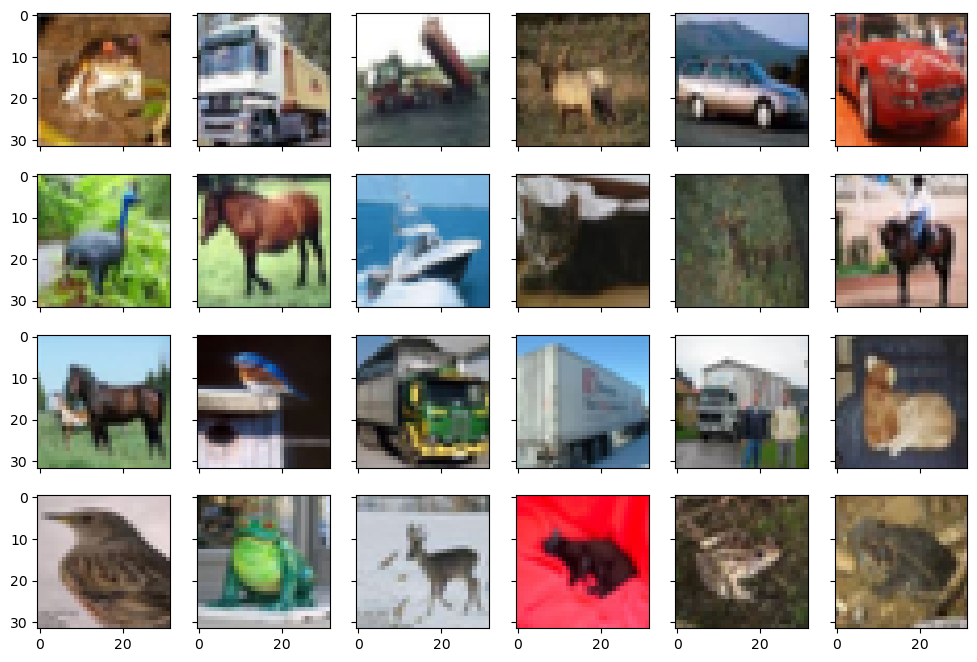

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import CIFAR10

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True) 
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8)) 
for i in range(0, 24):
     row, col = i//6, i%6
     ax[row][col].imshow(trainset.data[i])
plt.show()

trainset

Files already downloaded and verified
Files already downloaded and verified


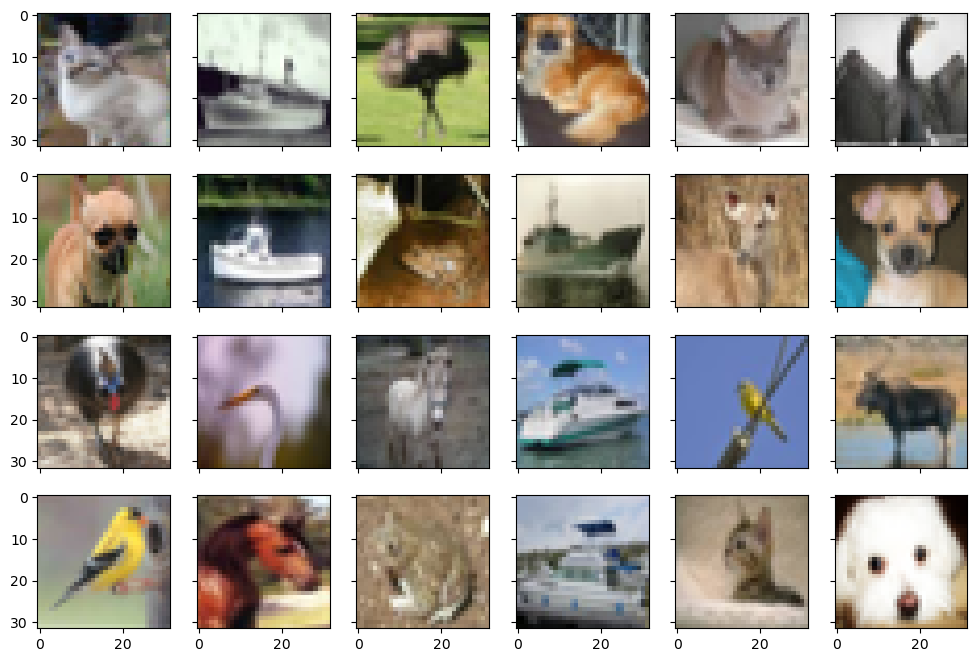

In [154]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)



batch_size = 24

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

print(trainloader)
fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6 
        ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
    break # take only the first batch plt.show()

In [165]:
import numpy as np
import random

import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2)),
    nn.Flatten(),
    nn.Linear(8192, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
 )

print(model)


loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
n_epochs = 20

for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)


TypeError: 'DataLoader' object is not subscriptable

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


In [10]:
from torchvision.datasets import CIFAR10
cifar = CIFAR10('./data/cifar10/', train=True, download=True) # Files already downloaded and verified
x = torch.from_numpy(cifar.data)[43].permute(2, 0, 1)
x[:, :4, :8]

100%|██████████| 170498071/170498071 [00:38<00:00, 4441244.63it/s]


Extracting ./data/cifar10/cifar-10-python.tar.gz to ./data/cifar10/


tensor([[[ 99,  98, 100, 103, 105, 107, 108, 110],
         [100, 100, 102, 105, 107, 109, 110, 112],
         [104, 104, 106, 109, 111, 112, 114, 116],
         [109, 109, 111, 113, 116, 117, 118, 120]],

        [[166, 165, 167, 169, 171, 172, 173, 175],
         [166, 164, 167, 169, 169, 171, 172, 174],
         [169, 167, 170, 171, 171, 173, 174, 176],
         [170, 169, 172, 173, 175, 176, 177, 178]],

        [[198, 196, 199, 200, 200, 202, 203, 204],
         [195, 194, 197, 197, 197, 199, 200, 201],
         [197, 195, 198, 198, 198, 199, 201, 202],
         [197, 196, 199, 198, 198, 199, 200, 201]]], dtype=torch.uint8)

In [15]:
torch.full((10,10),2)

tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])